In [1]:
import os 
import pandas as pd
import glob
import numpy as np 
from sklearn.model_selection import train_test_split

In [385]:
os.getcwd()

'/home/gtx1080/Desktop/jim/CCP/Data/New_Dataset'

## Train Validation Test split

In [ ]:
# makedirs if not exist
os.makedirs("Train_copper_crop/image_to_aug")
os.makedirs("Val_copper_crop/image_to_aug")
os.makedirs("Test_copper_crop/image_to_aug")
os.makedirs("Train_non_copper_crop/image_to_aug")
os.makedirs("Val_non_copper_crop/image_to_aug")
os.makedirs("Test_non_copper_crop/image_to_aug")

In [418]:
copper_crop = np.array(glob.glob("Copper_crop/*"))
non_copper_crop = np.array(glob.glob("Non_Copper_crop/*"))
print(len(copper_crop))
print(len(non_copper_crop))

4582
304431


### copper split

In [330]:
train_ix, test_ix = train_test_split(np.arange(len(glob.glob("Copper_crop/*"))), test_size = 0.4 )

In [419]:
val_ix = test_ix[:int(len(test_ix)/2)]
test_ix = test_ix[int(len(test_ix)/2):]

In [332]:
copper_train = copper_crop[train_ix]
copper_val = copper_crop[val_ix]
copper_test = copper_crop[test_ix]
print("copper train iamge: %s" % copper_train.shape)
print("copper val iamge: %s" % copper_val.shape)
print("copper test iamge: %s" % copper_test.shape)

copper train iamge: 2749
copper val iamge: 916
copper test iamge: 917


In [ ]:
# copt image filw
for file in copper_crop[train_ix]:
    shutil.copy2(file, "Train_copper_crop/" + os.path.basename(file))
for file in copper_crop[val_ix]:
    shutil.copy2(file, "Val_copper_crop/" + os.path.basename(file))
for file in copper_crop[test_ix]:
    shutil.copy2(file, "Test_copper_crop/" + os.path.basename(file))

In [363]:
print(set(glob.glob("Val_copper_crop/image_to_aug/*")).intersection(set(glob.glob("Train_copper_crop/image_to_aug/*"))))
print(set(glob.glob("Test_copper_crop/image_to_aug/*")).intersection(set(glob.glob("Train_copper_crop/image_to_aug/*"))))

set()
set()


### non_copper split

In [334]:
train_ix, test_ix = train_test_split(np.arange(len(glob.glob("Non_Copper_crop/*"))), test_size = 0.4 )

In [335]:
val_ix = test_ix[:int(len(test_ix)/2)]
test_ix = test_ix[int(len(test_ix)/2):]

In [336]:
non_copper_train = non_copper_crop[train_ix]
non_copper_val = non_copper_crop[val_ix]
non_copper_test = non_copper_crop[test_ix]
print("non_copper train iamge: %s" % non_copper_train.shape)
print("non_copper val iamge: %s" % non_copper_val.shape)
print("non_copper test iamge: %s" % non_copper_test.shape)

non_copper train iamge: 182658
non_copper val iamge: 60886
non_copper test iamge: 60887


In [ ]:
for file in non_copper_crop[train_ix]:
    shutil.copy2(file, "Train_non_copper_crop/" + os.path.basename(file))
for file in non_copper_crop[train_ix]:
    shutil.copy2(file, "Val_non_copper_crop/" + os.path.basename(file))
for file in non_copper_crop[test_ix]:
    shutil.copy2(file, "Test_non_copper_crop/" + os.path.basename(file))

In [383]:
print(set(glob.glob("Val_copper_crop//image_to_aug/*")).intersection(set(glob.glob("Train_copper_crop//image_to_aug/*"))))
print(set(glob.glob("Test_copper_crop//image_to_aug/*")).intersection(set(glob.glob("Train_copper_crop//image_to_aug/*"))))

set()
set()


In [382]:
print(set(glob.glob("Val_non_copper_crop//image_to_aug/*")).intersection(set(glob.glob("Train_non_copper_crop//image_to_aug/*"))))
print(set(glob.glob("Test_non_copper_crop//image_to_aug/*")).intersection(set(glob.glob("Train_non_copper_crop//image_to_aug/*"))))

set()
set()


## Image Augmentation

In [341]:
shutil.rmtree("Aug_Data_for_model/")

In [342]:
os.makedirs("Aug_data_for_model/training/train_copper_aug")
os.makedirs("Aug_data_for_model/training/train_non_copper_aug")
os.makedirs("Aug_data_for_model/validate/val_copper_aug")
os.makedirs("Aug_data_for_model/validate/val_non_copper_aug")
os.makedirs("Aug_data_for_model/testing/test_copper_aug")
os.makedirs("Aug_data_for_model/testing/test_non_copper_aug")

In [370]:
# set parameter
datagen = ImageDataGenerator(
        rotation_range=90,
        width_shift_range=0.15,
        height_shift_range=0.15,
        zoom_range=[0.8, 1.1],
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='wrap')

### copper aug

In [371]:
# non copper train aug
i = 0
for batch in datagen.flow_from_directory('Train_copper_crop', target_size=(200,200),                                       
    class_mode=None, shuffle=False, batch_size=128,
    save_to_dir='Aug_data_for_model/training/train_copper_aug/', save_prefix='aug', save_format='png'):
    sys.stdout.write("\rnum:" + str(i))   
    i += 1
    if i > 2343: # 182658 to 299,904 images
        break  # otherwise the generator would loop indefinitely

Found 2749 images belonging to 1 classes.
num:2343

In [372]:
print("training copper aug image: %s" % len(glob.glob("Aug_data_for_model/training/train_copper_aug/*")))

training copper aug image: 291413


In [373]:
# non copper train aug
i = 0
for batch in datagen.flow_from_directory('Val_copper_crop', target_size=(200,200),                                       
    class_mode=None, shuffle=False, batch_size=128,
    save_to_dir='Aug_data_for_model/validate/val_copper_aug/', save_prefix='aug', save_format='png'):
    sys.stdout.write("\rnum:" + str(i))   
    i += 1
    if i > 41: # 182658 to 299,904 images
        break  # otherwise the generator would loop indefinitely

Found 917 images belonging to 1 classes.
num:41

In [374]:
print("val copper aug image: %s" % len(glob.glob("Aug_data_for_model/validate/val_copper_aug/*")))

val copper aug image: 4840


In [375]:
# non copper train aug
i = 0
for batch in datagen.flow_from_directory('Test_copper_crop', target_size=(200,200),                                       
    class_mode=None, shuffle=False, batch_size=128,
    save_to_dir='Aug_data_for_model/testing/test_copper_aug/', save_prefix='aug', save_format='png'):
    sys.stdout.write("\rnum:" + str(i))   
    i += 1
    if i > 41: # 182658 to 299,904 images
        break  # otherwise the generator would loop indefinitely

Found 916 images belonging to 1 classes.
num:41

In [376]:
print("testing copper aug image: %s" % len(glob.glob("Aug_data_for_model/testing/test_copper_aug/*")))

testing copper aug image: 4834


### non copper aug

In [ ]:
# non copper train aug
i = 0
for batch in datagen.flow_from_directory('Train_non_copper_crop/', target_size=(200,200),                                       
    class_mode=None, shuffle=False, batch_size=128,
    save_to_dir='Aug_data_for_model/training/train_non_copper_aug//', save_prefix='aug', save_format='png'):
    sys.stdout.write("\rnum:" + str(i))   
    i += 1
    if i > 2343: # 182658 to 299,904 images
        break  # otherwise the generator would loop indefinitely

In [377]:
print("training non copper aug image: %s" % len(glob.glob("Aug_data_for_model/training/train_non_copper_aug/*")))

training non copper aug image: 299893


In [ ]:
# non copper val aug
i = 0
for batch in datagen.flow_from_directory('Val_non_copper_crop/', target_size=(200,200),                                       
    class_mode=None, shuffle=False, batch_size=128,
    save_to_dir='Aug_data_for_model/validate/val_non_copper_aug//', save_prefix='aug', save_format='png'):
    sys.stdout.write("\rnum:" + str(i))   
    i += 1
    if i > 235: # 182658 to 299,904 images
        break  # otherwise the generator would loop indefinitely

In [378]:
print("val non copper aug image: %s" % len(glob.glob("Aug_data_for_model*")))

val non copper aug image: 1


In [ ]:
# non copper train aug
i = 0
for batch in datagen.flow_from_directory('Test_non_copper_crop/', target_size=(200,200),                                       
    class_mode=None, shuffle=False, batch_size=128,
    save_to_dir='Aug_data_for_model/testing/test_non_copper_aug/', save_prefix='aug', save_format='png'):
    sys.stdout.write("\rnum:" + str(i))   
    i += 1
    if i > 235: # 182658 to 299,904 images
        break  # otherwise the generator would loop indefinitely

In [379]:
print("test non copper aug image: %s" % len(glob.glob("Aug_data_for_model/training/train_non_copper_aug/*")))

test non copper aug image: 299893


In [386]:
# check train/val/test result
print("training_copper_image: ", len(glob.glob("Aug_data_for_model/training/train_copper_aug/*.png")))
print("validata_copper_image: ", len(glob.glob("Aug_data_for_model/validate/val_copper_aug/*.png")))
print("testing_copper_image: ", len(glob.glob("Aug_data_for_model/testing/test_copper_aug/*.png")))
print("\n")
print("training_non_copper_image: ", len(glob.glob("Aug_data_for_model/training/train_non_copper_aug/*.png")))
print("validata_non_copper_image: ", len(glob.glob("Aug_data_for_model/validate/val_non_copper_aug/*.png")))
print("testing_non_copper_image: ", len(glob.glob("Aug_data_for_model/testing/test_non_copper_aug/*.png")))

training_copper_image:  291413
validata_copper_image:  4840
testing_copper_image:  4834


training_non_copper_image:  299893
validata_non_copper_image:  30208
testing_non_copper_image:  30208


## check augmentation result

In [388]:
# set parameter
datagen = ImageDataGenerator(
        rotation_range=90,
        width_shift_range=0.15,
        height_shift_range=0.15,
        zoom_range=[0.8, 1.1],
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='wrap')

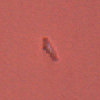

In [420]:
test_img = Image.open(glob.glob("Copper_crop/*")[20])
test_img

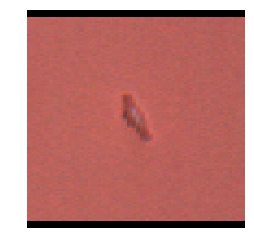

In [417]:
plt.imshow(np.array(Image.open(glob.glob("Copper/*")[20])))
plt.axis('off')
plt.savefig("origin.png", dpi = 700)

In [398]:
x = img_to_array(test_img)  
x = x.reshape((1,) + x.shape) 

In [404]:
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='test_image', save_prefix='aug', save_format='jpeg'):
    i += 1
    if i > 39:
        break  # otherwise the generator would loop indefinitely
in_imgs = np.array([np.array(Image.open(img_path)) for img_path in glob.glob("test_image/*")])

In [421]:
in_imgs.shape

(40, 100, 100, 3)

Populating the interactive namespace from numpy and matplotlib


/home/gtx1080/.local/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['axes']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


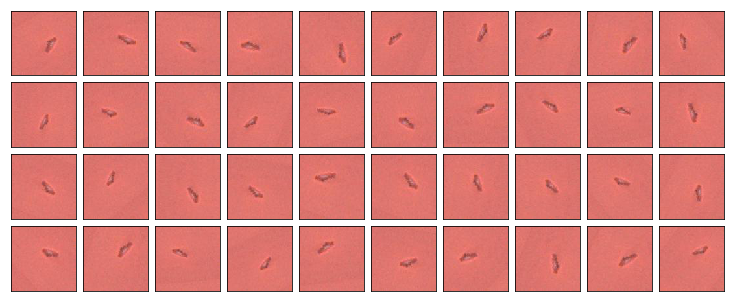

In [406]:
% pylab inline
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=4, ncols=10, sharex=True, sharey=True, figsize=(10,4))
a = in_imgs[:10]
b = in_imgs[10:20]
c = in_imgs[20:30]
d = in_imgs[30:40]
for images, row in zip([a, b, c, d], axes):
    for img, ax in zip(images, row):
        ax.imshow(img)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)


fig.tight_layout(pad=0.01)
plt.savefig("row.png", dpi = 700)
plt.show()